# 08 - Practical Example: Complete Data Engineering Visualization Project

## Introduction

This notebook combines all the concepts you've learned to create a comprehensive data engineering visualization dashboard. We'll simulate a real-world scenario of monitoring and analyzing an ETL pipeline.

## Scenario

You're a data engineer responsible for monitoring a data pipeline that processes data from multiple sources. You need to create a comprehensive dashboard showing:
- Pipeline performance metrics
- Data quality indicators
- Source data volumes
- Error analysis
- Trend analysis


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set style
plt.style.use('default')
np.random.seed(42)


## Step 1: Generate Sample Data

Let's create realistic ETL pipeline data.


In [2]:
# Generate 30 days of pipeline data
dates = pd.date_range('2024-01-01', periods=30, freq='D')

pipeline_data = pd.DataFrame({
    'Date': dates,
    'Source_A_Records': np.random.randint(10000, 30000, 30),
    'Source_B_Records': np.random.randint(15000, 35000, 30),
    'Source_C_Records': np.random.randint(8000, 25000, 30),
    'Processing_Time_Minutes': np.random.uniform(10, 50, 30),
    'Success_Rate': np.random.uniform(0.92, 0.99, 30),
    'Error_Count': np.random.randint(0, 100, 30),
    'Data_Quality_Score': np.random.uniform(0.85, 0.98, 30)
})

print("Pipeline Data Sample:")
print(pipeline_data.head())
print(f"\nTotal records processed: {pipeline_data[['Source_A_Records', 'Source_B_Records', 'Source_C_Records']].sum().sum():,}")


Pipeline Data Sample:
        Date  Source_A_Records  Source_B_Records  Source_C_Records  \
0 2024-01-01             25795             32912             14873   
1 2024-01-02             10860             26394             13675   
2 2024-01-03             15390             18556              8161   
3 2024-01-04             21964             18890             12297   
4 2024-01-05             21284             23838              8995   

   Processing_Time_Minutes  Success_Rate  Error_Count  Data_Quality_Score  
0                46.598387      0.961921           57            0.944668  
1                44.001543      0.968635           51            0.897812  
2                27.978027      0.981633           11            0.932200  
3                13.816405      0.963705           38            0.932359  
4                24.832730      0.940694            1            0.919651  

Total records processed: 1,762,471


## Step 2: Create Comprehensive Dashboard

Now let's create a professional dashboard with multiple visualizations.


/var/folders/qs/gl7f55l16vn33l0848mpksch0000gp/T/ipykernel_25466/4143893685.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


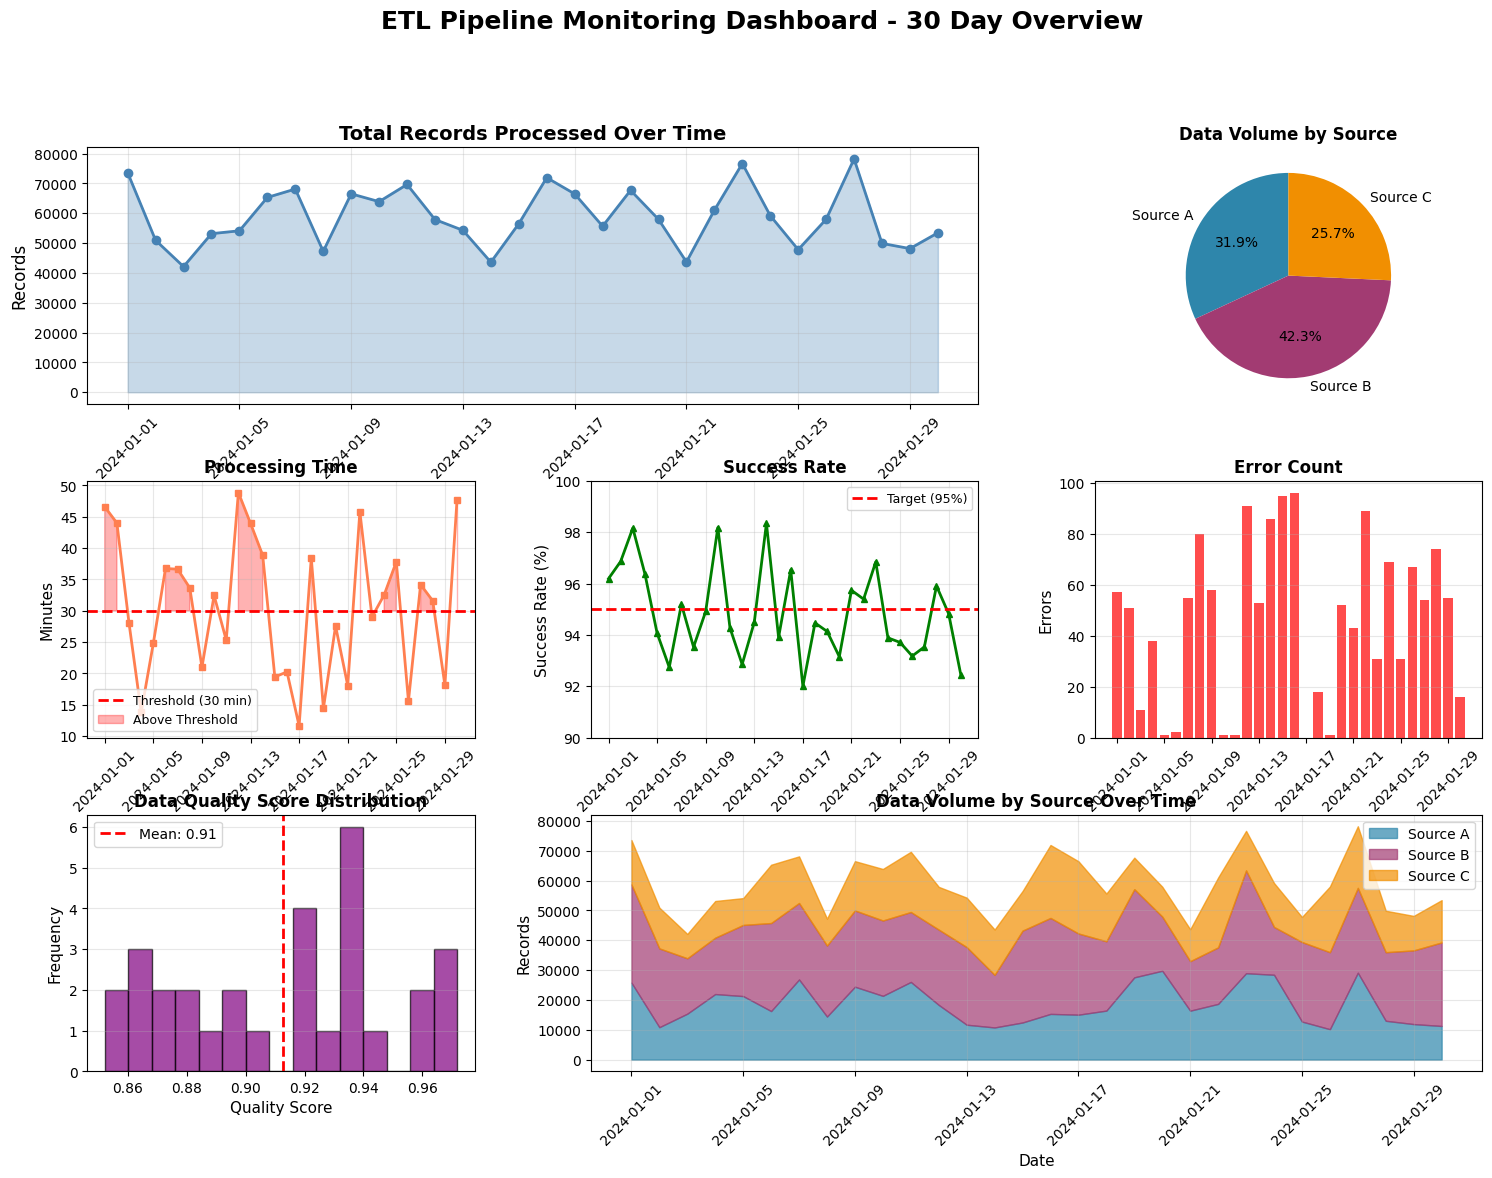

In [3]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Total Records Processed Over Time (Top, spans 2 columns)
ax1 = fig.add_subplot(gs[0, :2])
total_records = (pipeline_data['Source_A_Records'] + 
                 pipeline_data['Source_B_Records'] + 
                 pipeline_data['Source_C_Records'])
ax1.plot(pipeline_data['Date'], total_records, marker='o', linewidth=2, 
         color='steelblue', markersize=6)
ax1.fill_between(pipeline_data['Date'], total_records, alpha=0.3, color='steelblue')
ax1.set_title('Total Records Processed Over Time', fontsize=14, fontweight='bold')
ax1.set_ylabel('Records', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Data Sources Comparison (Pie Chart)
ax2 = fig.add_subplot(gs[0, 2])
source_totals = [
    pipeline_data['Source_A_Records'].sum(),
    pipeline_data['Source_B_Records'].sum(),
    pipeline_data['Source_C_Records'].sum()
]
ax2.pie(source_totals, labels=['Source A', 'Source B', 'Source C'], 
        autopct='%1.1f%%', startangle=90, colors=['#2E86AB', '#A23B72', '#F18F01'])
ax2.set_title('Data Volume by Source', fontsize=12, fontweight='bold')

# 3. Processing Time with Threshold
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(pipeline_data['Date'], pipeline_data['Processing_Time_Minutes'], 
         marker='s', linewidth=2, color='coral', markersize=5)
ax3.axhline(y=30, color='r', linestyle='--', linewidth=2, label='Threshold (30 min)')
ax3.fill_between(pipeline_data['Date'], 30, pipeline_data['Processing_Time_Minutes'],
                where=(pipeline_data['Processing_Time_Minutes'] > 30),
                alpha=0.3, color='red', label='Above Threshold')
ax3.set_title('Processing Time', fontsize=12, fontweight='bold')
ax3.set_ylabel('Minutes', fontsize=11)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# 4. Success Rate
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(pipeline_data['Date'], pipeline_data['Success_Rate'] * 100, 
         marker='^', linewidth=2, color='green', markersize=5)
ax4.axhline(y=95, color='r', linestyle='--', linewidth=2, label='Target (95%)')
ax4.set_title('Success Rate', fontsize=12, fontweight='bold')
ax4.set_ylabel('Success Rate (%)', fontsize=11)
ax4.set_ylim([90, 100])
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

# 5. Error Count
ax5 = fig.add_subplot(gs[1, 2])
ax5.bar(pipeline_data['Date'], pipeline_data['Error_Count'], 
        color='red', alpha=0.7, width=0.8)
ax5.set_title('Error Count', fontsize=12, fontweight='bold')
ax5.set_ylabel('Errors', fontsize=11)
ax5.grid(True, axis='y', alpha=0.3)
ax5.tick_params(axis='x', rotation=45)

# 6. Data Quality Score Distribution
ax6 = fig.add_subplot(gs[2, 0])
ax6.hist(pipeline_data['Data_Quality_Score'], bins=15, color='purple', 
         alpha=0.7, edgecolor='black')
ax6.axvline(pipeline_data['Data_Quality_Score'].mean(), color='red', 
           linestyle='--', linewidth=2, label=f'Mean: {pipeline_data["Data_Quality_Score"].mean():.2f}')
ax6.set_title('Data Quality Score Distribution', fontsize=12, fontweight='bold')
ax6.set_xlabel('Quality Score', fontsize=11)
ax6.set_ylabel('Frequency', fontsize=11)
ax6.legend()
ax6.grid(True, axis='y', alpha=0.3)

# 7. Source Comparison (Stacked Area)
ax7 = fig.add_subplot(gs[2, 1:])
ax7.fill_between(pipeline_data['Date'], 0, pipeline_data['Source_A_Records'], 
                 label='Source A', alpha=0.7, color='#2E86AB')
ax7.fill_between(pipeline_data['Date'], pipeline_data['Source_A_Records'],
                 pipeline_data['Source_A_Records'] + pipeline_data['Source_B_Records'],
                 label='Source B', alpha=0.7, color='#A23B72')
ax7.fill_between(pipeline_data['Date'],
                 pipeline_data['Source_A_Records'] + pipeline_data['Source_B_Records'],
                 total_records, label='Source C', alpha=0.7, color='#F18F01')
ax7.set_title('Data Volume by Source Over Time', fontsize=12, fontweight='bold')
ax7.set_xlabel('Date', fontsize=11)
ax7.set_ylabel('Records', fontsize=11)
ax7.legend()
ax7.grid(True, alpha=0.3)
ax7.tick_params(axis='x', rotation=45)

# Main title
fig.suptitle('ETL Pipeline Monitoring Dashboard - 30 Day Overview', 
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()


In [4]:
print("=" * 60)
print("PIPELINE PERFORMANCE SUMMARY")
print("=" * 60)
print(f"Average Processing Time: {pipeline_data['Processing_Time_Minutes'].mean():.2f} minutes")
print(f"Average Success Rate: {pipeline_data['Success_Rate'].mean()*100:.2f}%")
print(f"Total Errors: {pipeline_data['Error_Count'].sum()}")
print(f"Average Data Quality Score: {pipeline_data['Data_Quality_Score'].mean():.2f}")
print(f"Total Records Processed: {total_records.sum():,}")
print("=" * 60)


PIPELINE PERFORMANCE SUMMARY
Average Processing Time: 30.56 minutes
Average Success Rate: 94.86%
Total Errors: 1376
Average Data Quality Score: 0.91
Total Records Processed: 1,762,471


## Summary

In this practical example, you:

1. **Generated realistic pipeline data** for 30 days
2. **Created a comprehensive dashboard** with 7 different visualizations
3. **Combined multiple plot types**: line plots, pie charts, bar charts, histograms, stacked area
4. **Applied professional styling**: colors, labels, legends, grids
5. **Added threshold lines** and annotations for context
6. **Calculated summary statistics**

**Key Takeaways:**
- Real-world dashboards combine multiple visualization types
- Professional styling makes dashboards more credible
- Threshold lines and annotations provide context
- Comprehensive dashboards help identify issues quickly
- This approach can be adapted for any data engineering monitoring scenario

**Next Steps**: Practice with the exercises in the next notebook!
